<a href="https://colab.research.google.com/github/ThugMirror/Portfolio/blob/main/Chronic_Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chronic Kidney Disease Prediction

In [60]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [17]:
#Loading the Data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kidney_disease.csv')

#Print the first 5 rows
df.head()

Saving kidney_disease.csv to kidney_disease (1).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
# Get the shape of the Data (numbers of rows & columns)
df.shape

(400, 26)

In [25]:
#Creating a list of colums names ot keep
columns_to_retain = ['sg', 'al', 'sc', 'heml', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

#Droping the colums that are not in cloums_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)

#Dropin the rows with NA or missing values
df = df.dropna(axis=0)

In [26]:
#Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-26-856c2d0ae552>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-26-856c2d0ae552>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-26-856c2d0ae552>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [27]:
#Printing the first 5 rows for the new cleaned data
df.head()

,sg,al,sc,pcv,htn,classification
0,1.020,1.0,1.2,29,1,0
1,1.020,4.0,0.8,23,0,0
2,1.010,2.0,1.8,16,0,0
3,1.005,4.0,3.8,17,1,0
4,1.010,2.0,1.4,20,0,0


In [37]:
#Spliting the data into independent (X) data set ( the features) and dependent (Y) data set ( the targets)
X = df.drop(['classification'], axis=1)
y = df['classification']

In [40]:
#Feature Scaling
#min-max scaler method scales the data set so that all the input features lie between 0 & 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [41]:
#Spilting the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle= True)

In [31]:
#Building the Model
model = Sequential()
model.add(Dense(256, input_dim= len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))

In [55]:
#compiling the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
#Trian the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=X_train.shape[0])


Epoch 1/2000
1/1 [==============================] - 1s 778ms/step - loss: 0.6992 - accuracy: 0.1897
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6927 - accuracy: 0.4526
Epoch 3/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6863 - accuracy: 0.9698
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6798 - accuracy: 0.9569
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6734 - accuracy: 0.9483
Epoch 6/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6670 - accuracy: 0.9440
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6607 - accuracy: 0.9310
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6546 - accuracy: 0.9267
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6485 - accuracy: 0.9267
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6425 - accuracy: 0.9267
Epoch 11

In [58]:
#save the model
model.save('ckd.model')

Text(0.5, 0, 'ep')

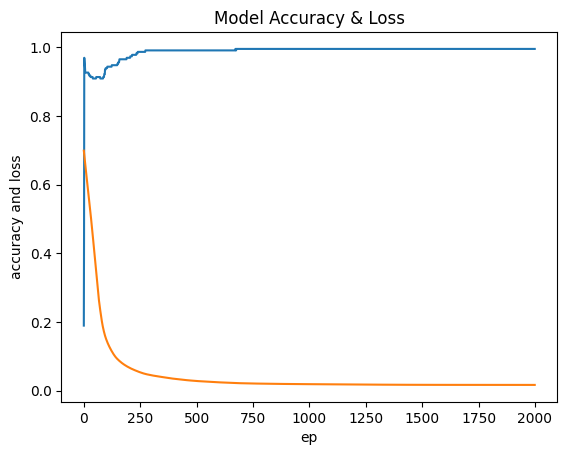

In [61]:
#visualize the model loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy & Loss')
plt.ylabel('accuracy and loss')
plt.xlabel('ep')

In [62]:
#Get the shape of training and testing data set
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of training data: (232, 5)
shape of test data: (58, 5)


In [66]:
#show the actual prediction values
pred = model.predict(X_test)
pred = [1 if y>0.5 else 0 for y in pred]

print('Orignal : {0}', format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}', format(", ".join(str(x) for x in pred)))

2/2 [==============================] - 0s 6ms/step
Orignal : {0} 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1
Predicted : {0} 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1
